In [55]:
#주어진 데이터셋에서 SUB와 OBJ에 따른 조합 결과를 확인하기 위한 코드

#관련된 라이브러리 임포트하기
import pandas as pd
from pandas.plotting import parallel_coordinates

from ast import literal_eval
import matplotlib.pyplot as plt

#훈련 데이터셋을 분석하고자 하니 훈련 데이터셋을 불러오기
train_path = "../data/train_data_type.csv"
train_data = pd.read_csv(train_path) #추후 절대경로로 변경하거나 폴더 안으로 데이터셋을 옮겨놓을 예정

In [56]:
#사용할 함수 선언
def unique_list(column):
    if column in train_data.columns:
        return [i for i in train_data[column].unique()]
    print("여기에 그런 column이 없습니다.")
    
def object2id(list_name, x):
    return list_name.index(x)

In [57]:
subject_list = unique_list("subject_type")
object_list = unique_list("object_type")
label_list = unique_list("label")

In [48]:
#train_data["subject_type"] = train_data["subject_type"].apply(lambda x : object2id(subject_list, x))

In [62]:
train_data["object_type"] = train_data["object_type"].apply(lambda x : object2id(object_list, x))

In [50]:
#train_data["label"] = train_data["label"].apply(lambda x : object2id(label_list, x)/6)

In [51]:
subject_list

['ORG', 'PER']

In [54]:
object_list

['PER', 'ORG', 'DAT', 'LOC', 'POH', 'NOH']

In [63]:
train_data

,subject_type,object_type,label
0,ORG,0,no_relation
1,ORG,1,no_relation
2,ORG,1,org:member_of
3,ORG,0,org:top_members/employees
4,ORG,2,no_relation
...,...,...,...
32465,PER,3,per:employee_of
32466,PER,0,per:colleagues
32467,ORG,0,org:top_members/employees
32468,ORG,1,no_relation


ValueError: could not convert string to float: 'no_relation'

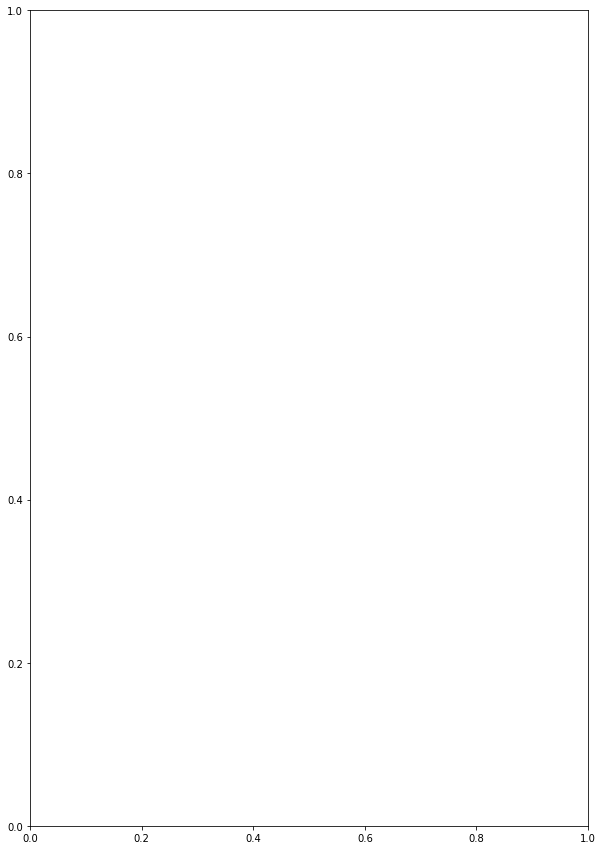

In [64]:
plt.figure(figsize=(10, 15))
parallel_coordinates(train_data, 'subject_type', color=('r', 'b'), alpha=0.1, axvlines=True)
plt.show()